# Credit Card Transactions Fraud Detection

In [1]:
# Importing required Modules and Libraries
import pandas as pd
import pandas_profiling
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px
import datetime as dt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.metrics import mean_absolute_error
import pickle

In [132]:
#importing dataset
fraud_df=pd.read_csv('Online_Fraud_Detection.csv',index_col=0)
fraud_df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0
1,2020-06-21 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0
2,2020-06-21 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0
3,2020-06-21 12:15,3.590000e+15,fraud_Haley Group,NaN,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0
4,2020-06-21 12:15,3.530000e+15,fraud_Johnston-Casper,NaN,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0


In [133]:
fraud_df.shape

(555719, 22)

# Understanding the dataset

In [134]:
fraud_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555479.000000,555696.000000,555583.000000,555606.000000,5.557190e+05,5.556970e+05,555427.000000,555449.000000,555719.000000
mean,4.178627e+17,69.396822,48842.458188,38.543271,-90.231378,8.822189e+04,1.380679e+09,38.542731,-90.231156,0.003860
std,1.309920e+18,156.760406,26855.230867,5.061263,13.721406,3.003909e+05,5.200908e+06,5.095764,13.732786,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800000e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755348,-96.904741,0.000000
50%,3.520000e+15,47.300000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380763e+09,39.376444,-87.445110,0.000000
75%,4.640000e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954032,-80.264625,0.000000
max,4.990000e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [135]:
#printing the columns of the dataset
fraud_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [136]:
#getting datatype of columns
fraud_df.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [137]:
#getting Type of dataset
type(fraud_df)

pandas.core.frame.DataFrame

In [138]:
#getting Dimension of dataset
fraud_df.ndim

2

In [139]:
import pandas_profiling as pp
profile = pp.ProfileReport(fraud_df)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\devel\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Handling and Exploratory Data Analysis

#### Checking the null values

In [140]:
fraud_df.isnull().sum()

trans_date_trans_time      0
cc_num                     0
merchant                   0
category                   5
amt                      240
first                      0
last                       0
gender                   813
street                   165
city                     159
state                     13
zip                       23
lat                      136
long                     113
city_pop                   0
job                       15
dob                        0
trans_num                  0
unix_time                 22
merch_lat                292
merch_long               270
is_fraud                   0
dtype: int64

In [141]:
fraud_df=fraud_df.dropna()

In [142]:
fraud_df.shape

(554114, 22)

### dropping Null values

### Checking for duplicates

In [143]:
bool_series = fraud_df.duplicated()
bool_series.value_counts()

False    554114
dtype: int64

In [144]:
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0
1,2020-06-21 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0
2,2020-06-21 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0
8,2020-06-21 12:16,3.600000e+15,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,Morrisdale,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1.371817e+09,41.546067,-78.120238,0
9,2020-06-21 12:16,3.550000e+15,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1.371817e+09,31.782919,-96.366185,0


In [145]:
fraud_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 554114 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  554114 non-null  object 
 1   cc_num                 554114 non-null  float64
 2   merchant               554114 non-null  object 
 3   category               554114 non-null  object 
 4   amt                    554114 non-null  float64
 5   first                  554114 non-null  object 
 6   last                   554114 non-null  object 
 7   gender                 554114 non-null  object 
 8   street                 554114 non-null  object 
 9   city                   554114 non-null  object 
 10  state                  554114 non-null  object 
 11  zip                    554114 non-null  float64
 12  lat                    554114 non-null  float64
 13  long                   554114 non-null  float64
 14  city_pop               554114 non-nu

# Extracting new column age from the column date of birth and todays time

In [146]:
fraud_df['age']=dt.date.today().year-pd.to_datetime(fraud_df['dob']).dt.year

C:\Users\devel\AppData\Local\Temp\ipykernel_49164\3838549480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['age']=dt.date.today().year-pd.to_datetime(fraud_df['dob']).dt.year


In [147]:
fraud_df['age']

0         54
1         32
2         52
8         49
9         66
          ..
555714    56
555715    23
555716    41
555717    57
555718    29
Name: age, Length: 554114, dtype: int64

In [148]:
fraud_df.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                   int64
age                        int64
dtype: object

## Obtaining the year,month and hour from the transaction date 

In [149]:
fraud_df["hour"] = pd.DatetimeIndex(fraud_df["trans_date_trans_time"]).hour
fraud_df["month"] = pd.DatetimeIndex(fraud_df["trans_date_trans_time"]).month
fraud_df['dayofweek'] = pd.DatetimeIndex(fraud_df["trans_date_trans_time"]).dayofweek + 1
fraud_df["day"] = pd.DatetimeIndex(fraud_df["trans_date_trans_time"]).day
fraud_df = fraud_df.drop("trans_date_trans_time",1)

C:\Users\devel\AppData\Local\Temp\ipykernel_49164\3703977772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df["hour"] = pd.DatetimeIndex(fraud_df["trans_date_trans_time"]).hour
C:\Users\devel\AppData\Local\Temp\ipykernel_49164\3703977772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df["month"] = pd.DatetimeIndex(fraud_df["trans_date_trans_time"]).month
C:\Users\devel\AppData\Local\Temp\ipykernel_49164\3703977772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [150]:
fraud_df["month"].nunique

<bound method IndexOpsMixin.nunique of 0          6
1          6
2          6
8          6
9          6
          ..
555714    12
555715    12
555716    12
555717    12
555718    12
Name: month, Length: 554114, dtype: int64>

## Target Variable-is_fraud Distribution

In [151]:
fraud_df[['is_fraud']].groupby(['is_fraud']).size()

is_fraud
0    551969
1      2145
dtype: int64

### Count Plot for the Target variable: is_fraud

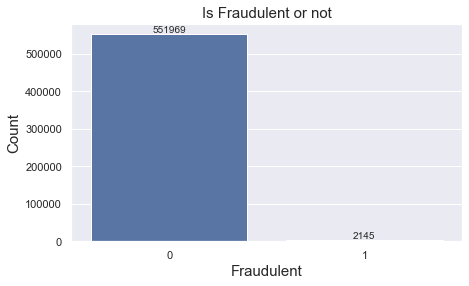

In [152]:
%matplotlib inline 
plt.figure(figsize=(7, 4))
labels=fraud_df["is_fraud"].value_counts()
ax=sns.countplot(data=fraud_df, x="is_fraud")
ax.bar_label(container=ax.containers[0], labels=labels)

plt.title("Is Fraudulent or not", size=15)
plt.xlabel("Fraudulent", size=15)
plt.ylabel("Count", size=15)
plt.show()

## Understanding the categorical columns and its distributions

In [153]:
categorical_columns = [column for column in fraud_df.columns if fraud_df[column].dtype == 'object']
categorical_columns

['merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'trans_num']

## Relation between Target Variable and Categorical columns

## bar plot of  is_fraud and job

In [154]:
fraud_df.groupby(['gender'])['is_fraud'].count()

gender
F    304032
M    250082
Name: is_fraud, dtype: int64

### Fraudulent count for each job groups

<AxesSubplot:title={'center':'Count for each job groups'}, xlabel='count', ylabel='job'>

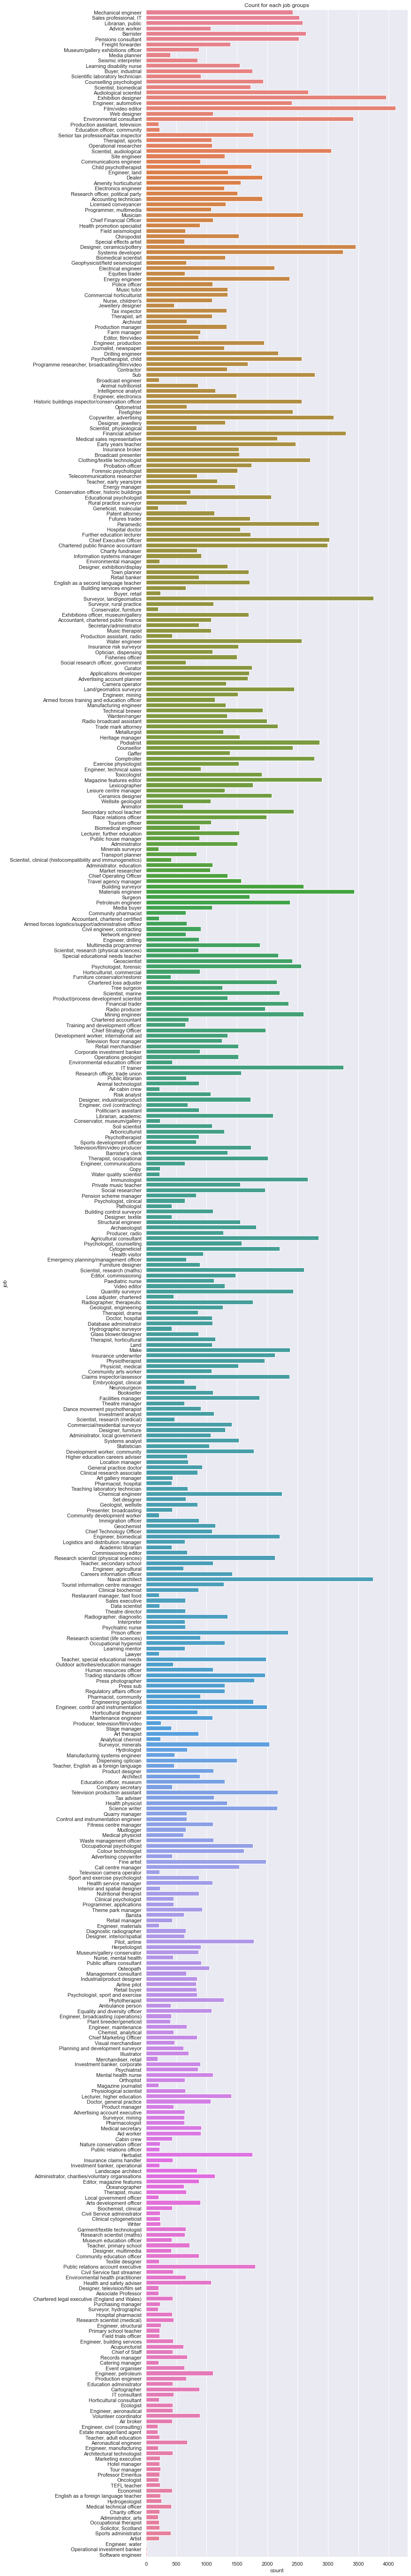

In [155]:
plt.rcParams['figure.figsize']=(10,100)
plt.title('Count for each job groups')
sns.countplot(y="job", data=fraud_df, palette="husl")

In [156]:
fraud_df.groupby(['job'])['is_fraud'].count()

job
Academic librarian                       424
Accountant, chartered certified          215
Accountant, chartered public finance    1076
Accounting technician                   1915
Acupuncturist                            618
                                        ... 
Water engineer                          2569
Water quality scientist                  223
Web designer                            1102
Wellsite geologist                      1066
Writer                                   236
Name: is_fraud, Length: 478, dtype: int64

### Column Category

### Distinct Values for category and its count

In [157]:
fraud_df[['category']].groupby(['category']).size()

category
entertainment     40009
food_dining       39178
gas_transport     56108
grocery_net       19341
grocery_pos       52306
health_fitness    36615
home              52247
kids_pets         48617
misc_net          27254
misc_pos          34457
personal_care     39264
shopping_net      41639
shopping_pos      49659
travel            17420
dtype: int64

<AxesSubplot:title={'center':'Count for each category groups'}, xlabel='count', ylabel='category'>

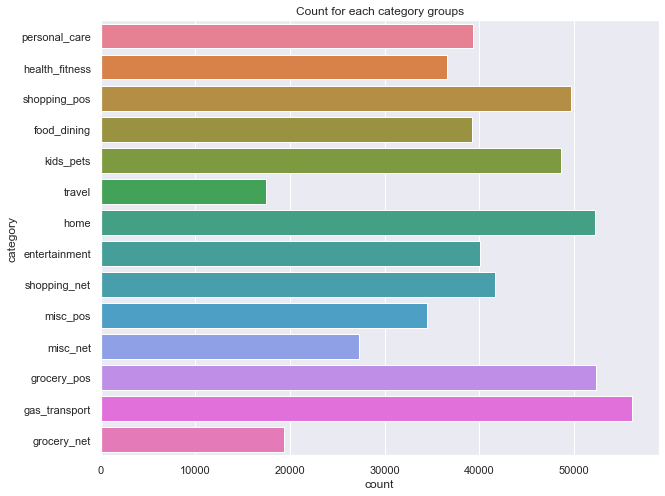

In [158]:
plt.rcParams['figure.figsize']=(10,8)
plt.title('Count for each category groups')
sns.countplot(y="category", data=fraud_df, palette="husl")

Text(0.5, 1.0, 'Distribution of category')

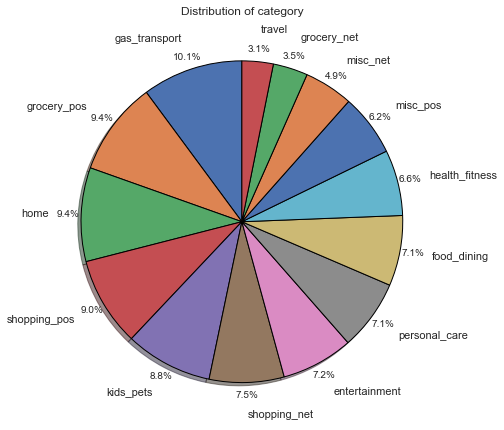

In [159]:
fig = plt.figure(figsize=(7,7))
wp = {'linewidth':1, 'edgecolor':"black"}
tags = fraud_df['category'].value_counts()

tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, 
         startangle=90, wedgeprops = wp,  label='',pctdistance=1.08,labeldistance=1.2)
plt.tight_layout()
plt.title('Distribution of category')


In [160]:
CrosstabResultCat=pd.crosstab(index=fraud_df['category'],columns=fraud_df['is_fraud'])
print(CrosstabResult)

is_fraud       0     1
gender                
F         302868  1164
M         249101   981


<Figure size 1152x576 with 0 Axes>

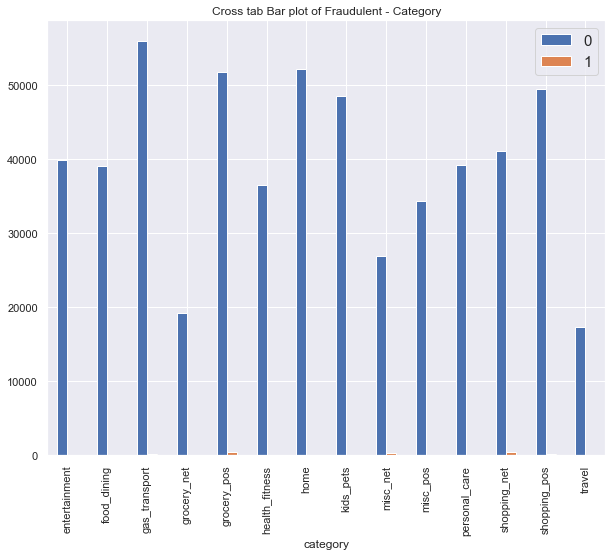

In [161]:
plt.figure(figsize=(16,8))
ax=CrosstabResultCat.plot.bar()
plt.title('Cross tab Bar plot of Fraudulent - Category')
ax.legend(fontsize=15)
plt.rcParams.update({'font.size': 24})
plt.rcParams["axes.labelsize"] = 15
plt.show()

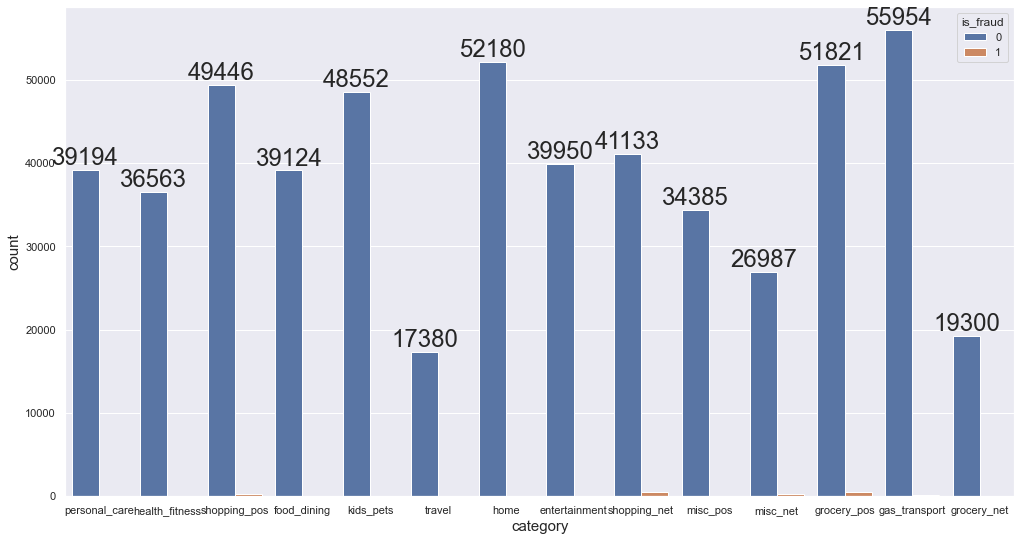

In [162]:
fig = plt.figure(figsize= (17,9))
ax=sns.countplot(data=fraud_df,x="category",hue="is_fraud")
ax.bar_label(ax.containers[0])
plt.rcParams['font.size']= 20

### Column: Gender

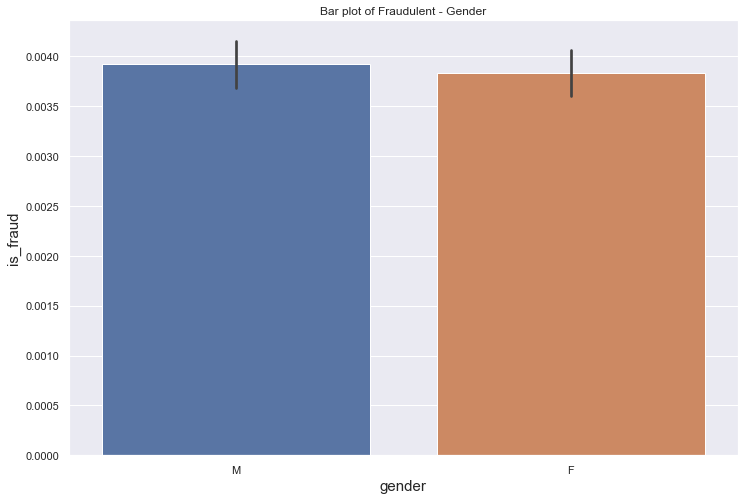

In [163]:
plt.figure(figsize=(12,8))
sns.barplot(x='gender',y = 'is_fraud',data=fraud_df)
plt.title('Bar plot of Fraudulent - Gender')
plt.rcParams['font.size']= 25
plt.show()

Text(0.5, 1.0, 'Distribution of gender')

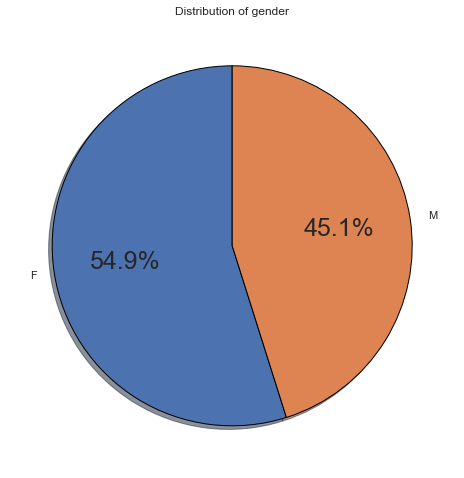

In [164]:

fig = plt.figure(figsize=(7,7))
wp = {'linewidth':1, 'edgecolor':"black"}
tags = fraud_df['gender'].value_counts()

tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, 
         startangle=90, wedgeprops = wp,  label='')
plt.tight_layout()
plt.title('Distribution of gender')

In [165]:
CrosstabResult=pd.crosstab(index=fraud_df['gender'],columns=fraud_df['is_fraud'])
print(CrosstabResult)

is_fraud       0     1
gender                
F         302868  1164
M         249101   981


<Figure size 1152x576 with 0 Axes>

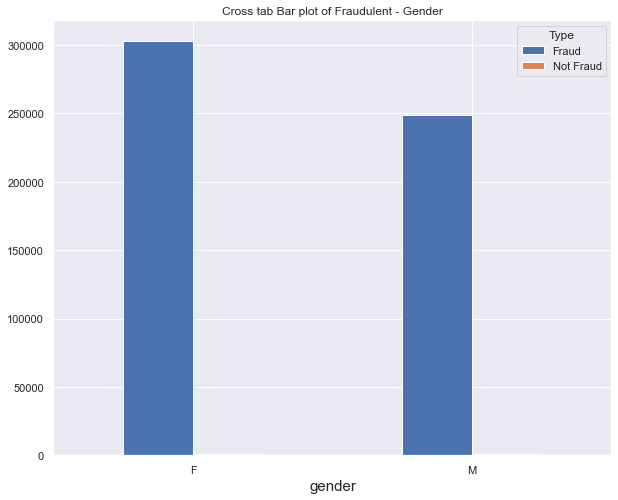

In [166]:
plt.figure(figsize=(16,8))
a=CrosstabResult.plot.bar()
a.tick_params(axis='x',rotation=360)
#a.bar_label(ax.containers[0])
plt.rcParams['font.size']= 10
plt.title('Cross tab Bar plot of Fraudulent - Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.rcParams.update({'font.size': 10})
plt.rcParams['font.size']= 20
plt.show()

### Crosstab for columns: City and State

In [167]:
CrosstabResultcity=pd.crosstab(index=fraud_df['city'],columns=fraud_df['is_fraud'])
print(CrosstabResultcity)

is_fraud                     0   1
city                              
Achille                    208   0
Acworth                    828   0
Adams                      210  12
Afton                      887   7
Akron                      213   9
...                        ...  ..
Woods Cross                216   0
Woodville                  800  10
Yellowstone National Park  216   0
Zaleski                    637   0
Zavalla                    647  12

[849 rows x 2 columns]


In [168]:
CrosstabResultstate=pd.crosstab(index=fraud_df['state'],columns=fraud_df['is_fraud'])
print(CrosstabResultstate)

is_fraud      0    1
state               
AK          828   14
AL        17420   63
AR        13425   34
AZ         4553   27
CA        23980   76
CO         5863    2
CT         3231   40
DC         1501   10
FL        17997   53
GA        11187   58
HI         1079    9
IA        11720   69
ID         2463   22
IL        18836   76
IN        11849   75
KS         9877   37
KY        12411   67
LA         8930   22
MA         5149   18
MD        11062   46
ME         6887   15
MI        19542   61
MN        13611   73
MO        16380   71
MS         8757   54
MT         4992   37
NC        12778   46
ND         6354   27
NE        10194   36
NH         3420   20
NJ        10455   43
NM         6962   39
NV         2446    0
NY        35651  175
OH        20056   39
OK        11292   57
OR         7742   48
PA        34110  114
RI          194    0
SC        12464   43
SD         5214   18
TN         7315   19
TX        40169  113
UT         4643    0
VA        12394   75
VT         50

### Column: merchant

In [169]:
CrosstabResultmerchant=pd.crosstab(index=fraud_df['merchant'],columns=fraud_df['is_fraud'])
print(CrosstabResultmerchant)

is_fraud                             0  1
merchant                                 
fraud_Abbott-Rogahn                801  1
fraud_Abbott-Steuber               764  2
fraud_Abernathy and Sons           758  0
fraud_Abshire PLC                  838  0
fraud_Adams, Kovacek and Kuhlman   411  1
...                                ... ..
fraud_Zemlak Group                 581  7
fraud_Zemlak, Tillman and Cremin   731  1
fraud_Ziemann-Waters               737  4
fraud_Zieme, Bode and Dooley      1152  2
fraud_Zulauf LLC                   820  2

[693 rows x 2 columns]


In [171]:
n = 5
fraud_df['city'].value_counts().index.tolist()[:n]

['Birmingham', 'Meridian', 'Phoenix', 'Utica', 'San Antonio']

In [172]:
freq_city_df = fraud_df[(fraud_df['city'] =='Birmingham') | (fraud_df['city'] =='Meridian')| (fraud_df['city'] =='Phoenix')| (fraud_df['city'] =='Utica')| (fraud_df['city'] =='San Antonio')]
freq_city_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour,month,dayofweek,day
41,5.040000e+11,"fraud_Moore, Williamson and Emmerich",home,47.81,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,...,4ffb7174155b877c4d18d1d86e71e813,1.371818e+09,30.509950,-99.374201,0,47,12,6,7,21
83,6.010000e+15,fraud_Powlowski-Weimann,food_dining,19.06,Samuel,Johnston,M,16285 Jessica Lights,Birmingham,AL,...,e77fc08b8dcf79c20e724fea72946660,1.371818e+09,33.936769,-86.762376,0,42,12,6,7,21
114,3.580000e+15,fraud_Berge-Ullrich,home,61.44,Jessica,Ward,F,72269 Elizabeth Field Apt. 132,Phoenix,AZ,...,8ff1723f3c170304d75667e0b38340a9,1.371819e+09,33.914314,-111.576584,0,41,12,6,7,21
118,3.690000e+13,fraud_Monahan-Morar,personal_care,28.74,Ana,Mccormick,F,4503 Patricia Route,Meridian,ID,...,deacd215ee877a514656c57be9a2b48d,1.371819e+09,43.845330,-116.859776,0,51,12,6,7,21
216,3.600000e+15,"fraud_Welch, Rath and Koepp",entertainment,51.75,Sara,Ramirez,F,23843 Scott Island,Birmingham,IA,...,d43c298b51ab1ab7125e9233b79844fc,1.371821e+09,40.049524,-92.471643,0,34,13,6,7,21


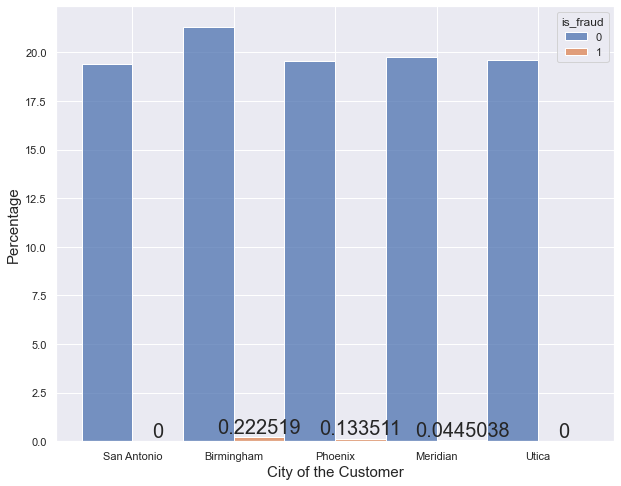

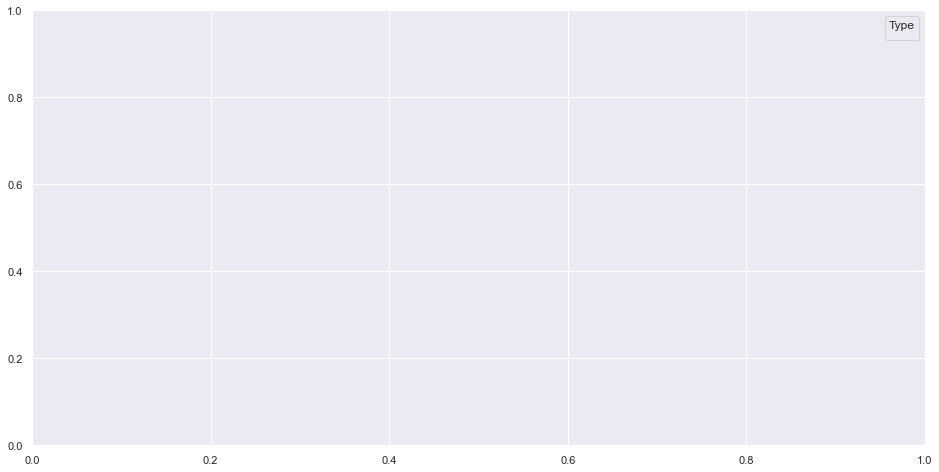

In [173]:
ax=sns.histplot(x='city', data=freq_city_df, stat='percent', multiple='dodge', hue='is_fraud')
plt.figure(figsize=(16,8))
ax.set_ylabel('Percentage')
ax.set_xlabel('City of the Customer')
ax.bar_label(ax.containers[0])
ax.lab_fontsize = 10
plt.rcParams['font.size']= 10

plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

# Plot for frauds on top cities

<Figure size 216x216 with 0 Axes>

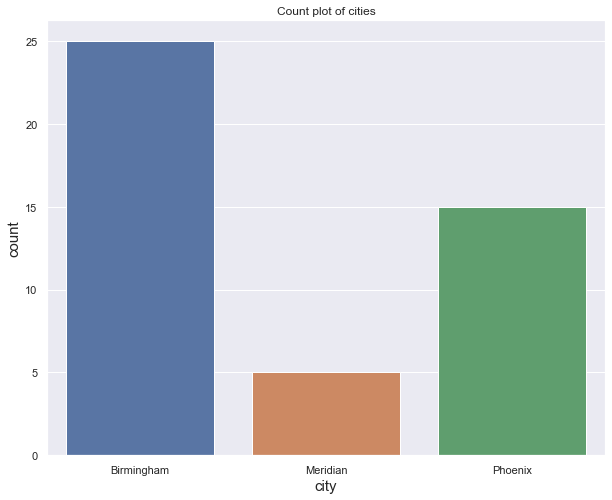

<Figure size 216x216 with 0 Axes>

In [174]:
sns.countplot(x="city",data=freq_city_df[freq_city_df["is_fraud"]==1])
plt.title("Count plot of cities")
plt.rcParams['font.size']= 20
plt.figure(figsize=(3,3))

# Understanding the numerical columns and its distributions

In [175]:
numerical_columns = [column for column in fraud_df.columns if fraud_df[column].dtype != 'object']
numerical_columns

['cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'age',
 'hour',
 'month',
 'dayofweek',
 'day']

In [176]:
numeric_data = fraud_df.select_dtypes(include=[np.number])

In [177]:
numeric_data.columns

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'hour', 'month',
       'dayofweek', 'day'],
      dtype='object')

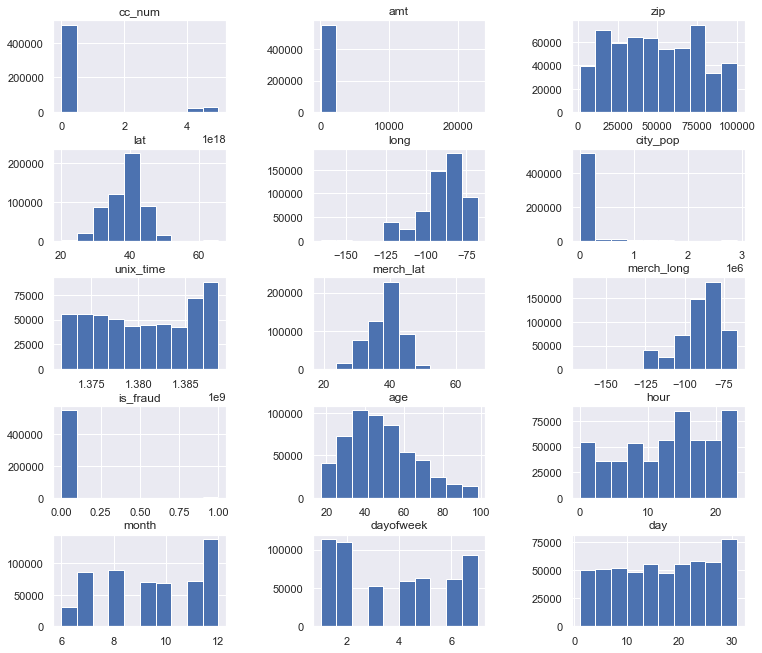

In [178]:
fig=numeric_data.hist(figsize=(12,12),layout=(6,3),sharex=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.05,
                    right=0.9,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.4)

### Columns: amt

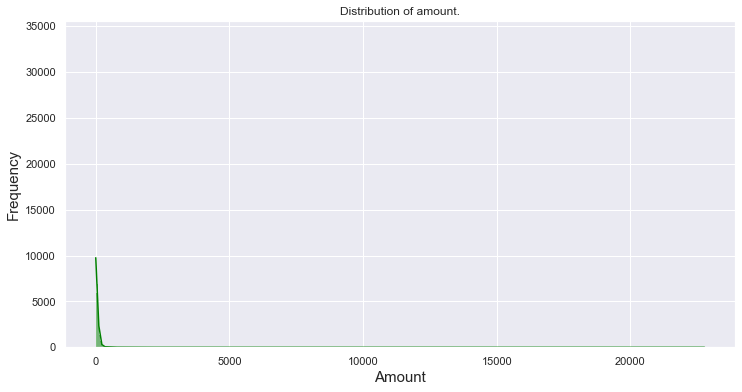

In [179]:
plt.rcParams['figure.figsize']=(8,5)
plt.rcParams['font.size']= 10
plt.figure(figsize=(12, 6))
plt.title('Distribution of amount.')
plt.xlabel('Amount')
plt.ylabel('Frequency')
fig1 = sns.histplot(x=fraud_df.amt,color = 'green',kde=True,line_kws= {'color':'black'})
plt.show()

### Column: Age

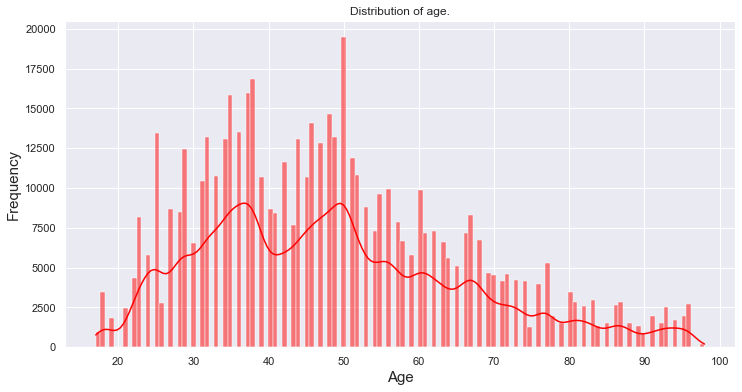

In [180]:
plt.rcParams['figure.figsize']=(8,5)
plt.rcParams['font.size']= 10
plt.figure(figsize=(12, 6))
plt.title('Distribution of age.')
plt.xlabel('Age')
plt.ylabel('Frequency')
fig1 = sns.histplot(x=fraud_df.age,color = 'red',kde=True,line_kws= {'color':'black'})
plt.show()

Text(0.5, 1.0, 'Count plot of Age')

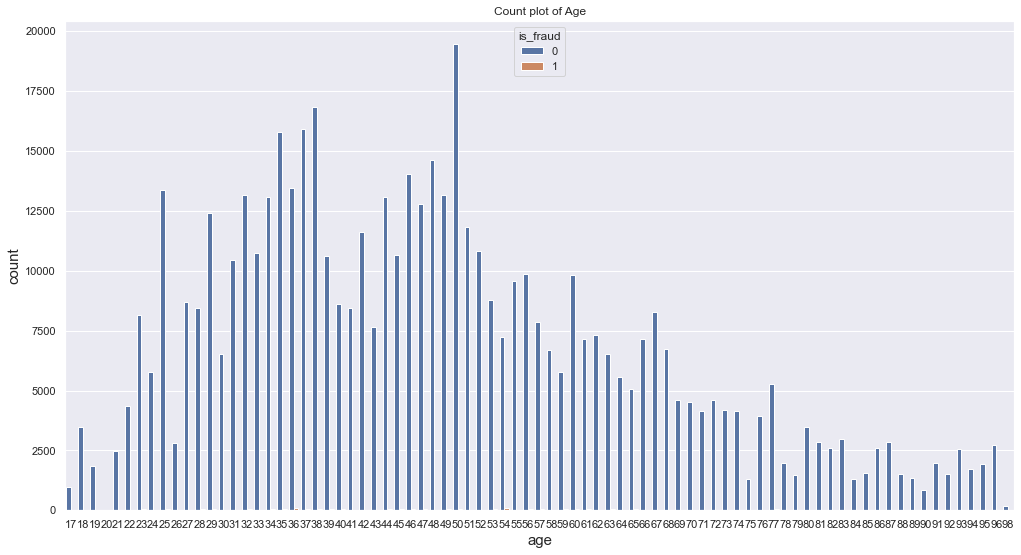

In [181]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=fraud_df,x="age",hue="is_fraud")
plt.title('Count plot of Age')


<AxesSubplot:xlabel='age', ylabel='count'>

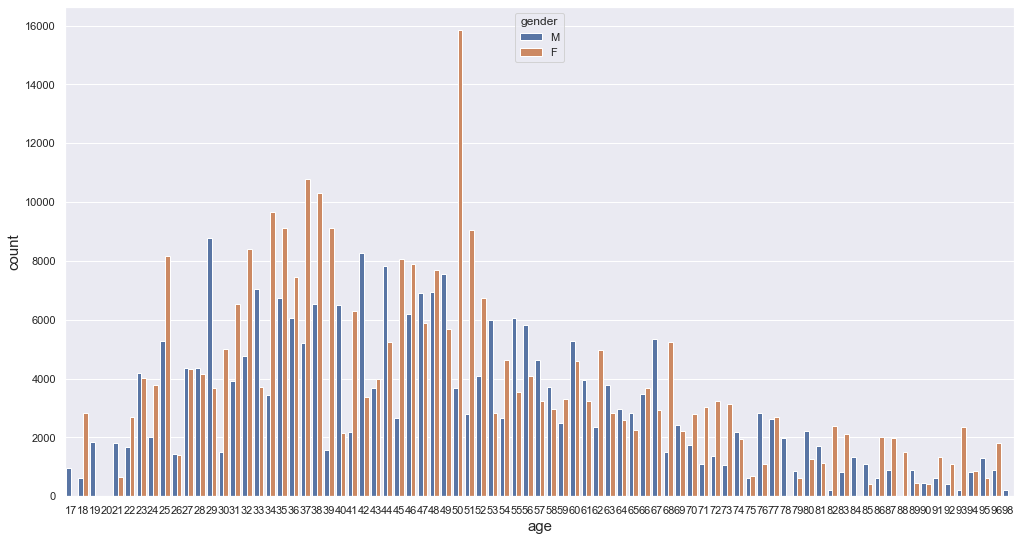

In [182]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=fraud_df,x="age",hue="gender")

C:\Users\devel\AppData\Local\Temp\ipykernel_49164\3517899263.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


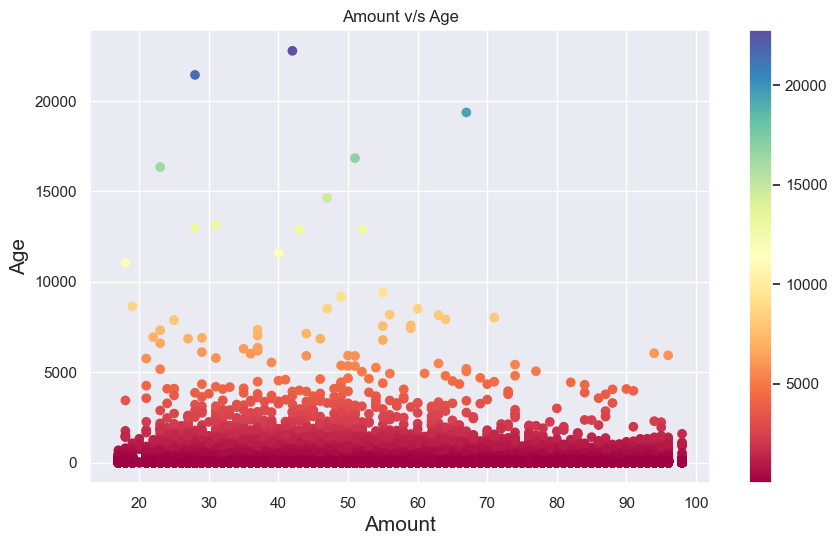

In [183]:
y = fraud_df['amt']
x = fraud_df['age']
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.title('Amount v/s Age')
plt.xlabel('Amount')
plt.ylabel('Age')
plt.show()

<AxesSubplot:xlabel='month', ylabel='count'>

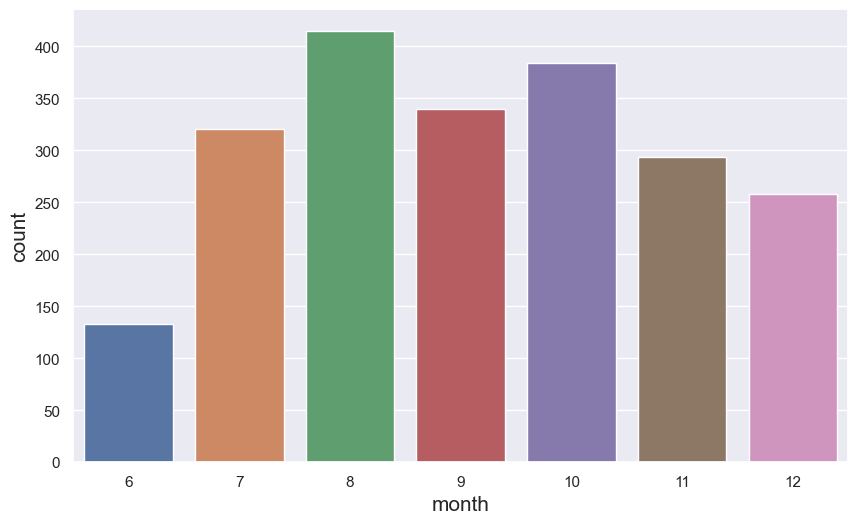

In [184]:
sns.countplot(x="month",data=fraud_df[fraud_df["is_fraud"]==1])

<AxesSubplot:xlabel='hour', ylabel='count'>

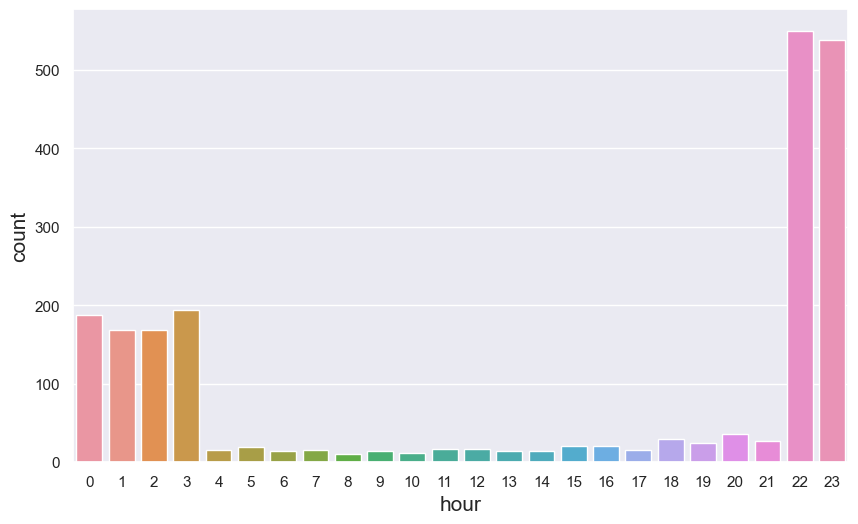

In [185]:
sns.countplot(x="hour",data=fraud_df[fraud_df["is_fraud"]==1])

<Figure size 1200x1200 with 0 Axes>

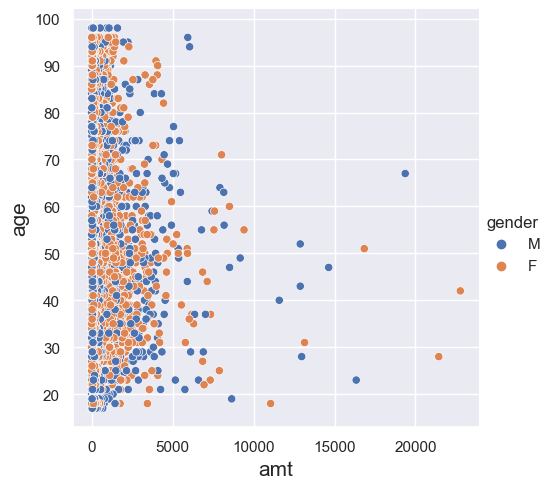

<Figure size 1200x1200 with 0 Axes>

In [186]:
sns.relplot(data=fraud_df,x="amt", y="age", hue="gender")
plt.figure(figsize=(12, 12))

# Outlier Detection

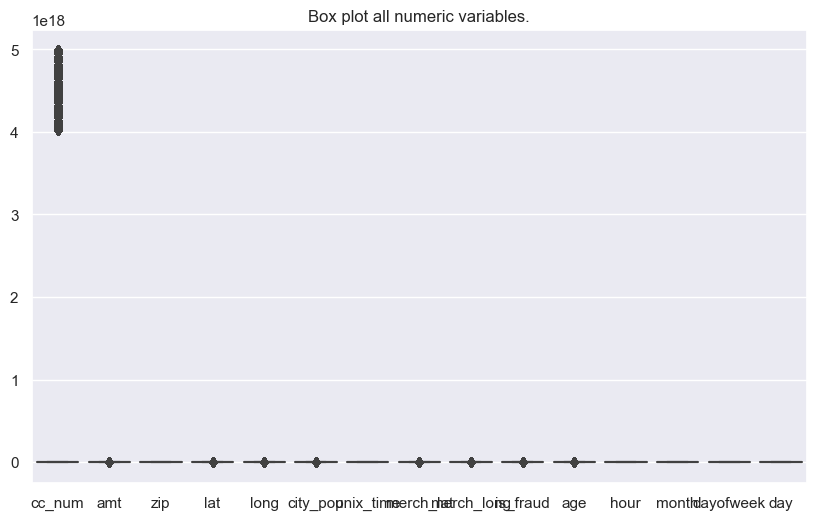

In [187]:
sns.boxplot(data=fraud_df, palette="husl")
plt.rcParams['font.size']= 8
plt.rcParams['figure.figsize']=(10,5)
plt.title('Box plot all numeric variables.')
plt.show()

## column: amt

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


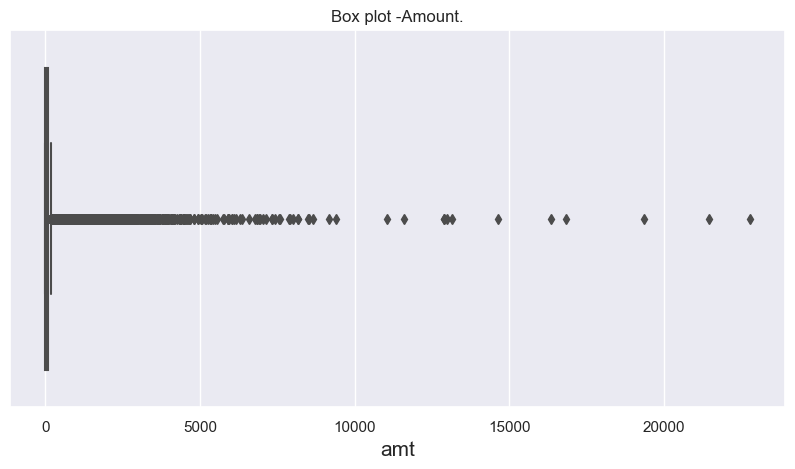

In [188]:
sns.boxplot( fraud_df['amt'],color='yellow' )
plt.rcParams['figure.figsize']=(10,5)
plt.title('Box plot -Amount.')
plt.show()

## Log transformation on Amount

In [189]:
fraud_df['log_amt']=fraud_df['amt'].map(lambda x: np.log(x) if x > 0 else 0)

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


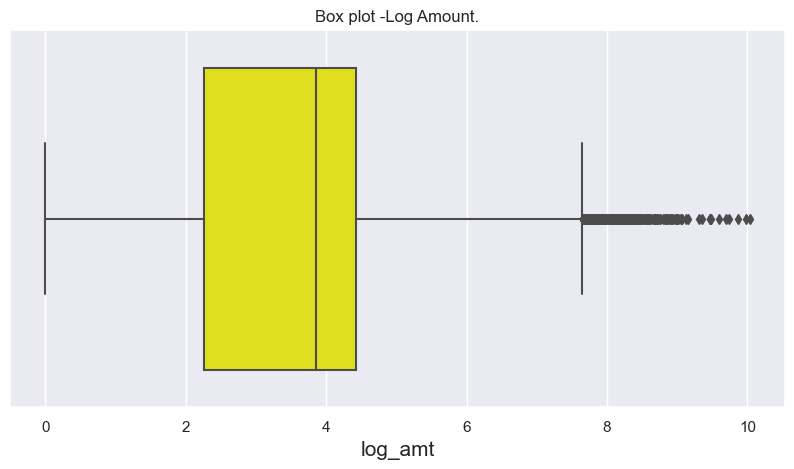

In [190]:
sns.boxplot( fraud_df['log_amt'],color='yellow' )
plt.rcParams['figure.figsize']=(10,5)
plt.title('Box plot -Log Amount.')
plt.show()

## column: age

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


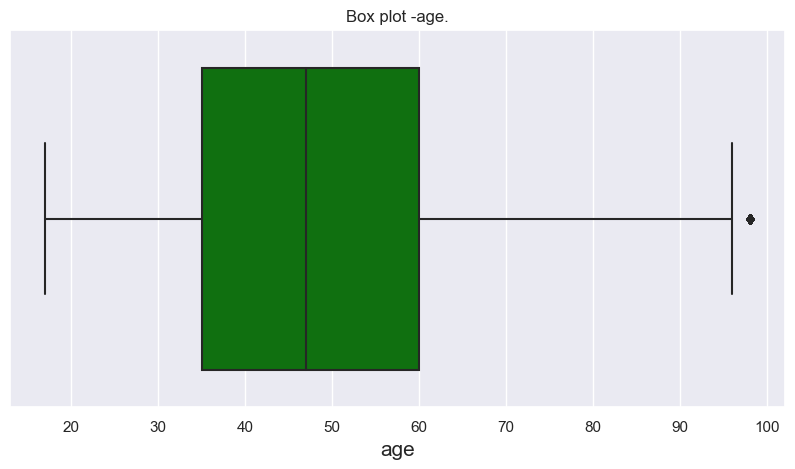

In [191]:
sns.boxplot( fraud_df['age'],color='green' )
plt.rcParams['figure.figsize']=(10,5)
plt.title('Box plot -age.')
plt.show()

### Quantile based Trimming

In [192]:
Q1 = fraud_df['age'].quantile(0.25)
Q3 = fraud_df['age'].quantile(0.75)
IQR = Q3 - Q1

In [193]:
fraud_df['age'][fraud_df['age']>(Q3+1.5*IQR)]

174       98
1910      98
3509      98
6484      98
6845      98
          ..
535075    98
539053    98
542010    98
546363    98
552905    98
Name: age, Length: 199, dtype: int64

In [194]:
fraud_df.shape

(554114, 27)

In [195]:
trim_fraud=fraud_df[fraud_df['age']<(Q3+1.5*IQR)]

In [196]:
trim_fraud.shape

(553915, 27)

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


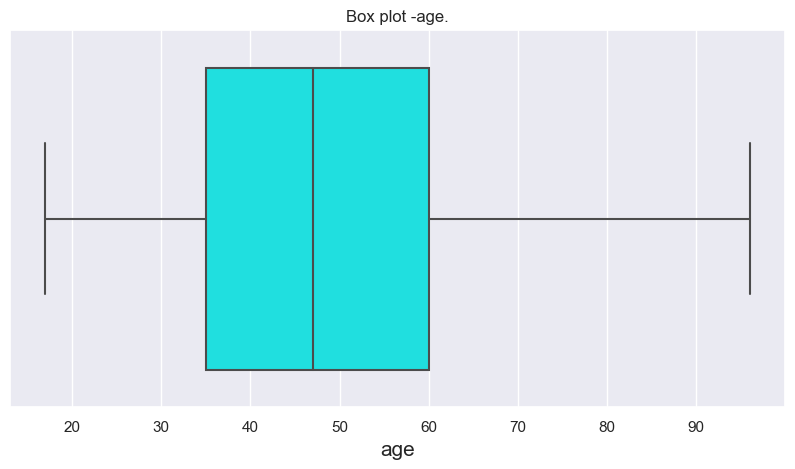

In [197]:
sns.boxplot( trim_fraud['age'],color='cyan' )
plt.rcParams['figure.figsize']=(10,5)
plt.title('Box plot -age.')
plt.show()

# Heat_Map for the numeric variables

In [198]:
numerical_columns = [column for column in trim_fraud.columns if trim_fraud[column].dtype != 'object']
numerical_columns

['cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'age',
 'hour',
 'month',
 'dayofweek',
 'day',
 'log_amt']

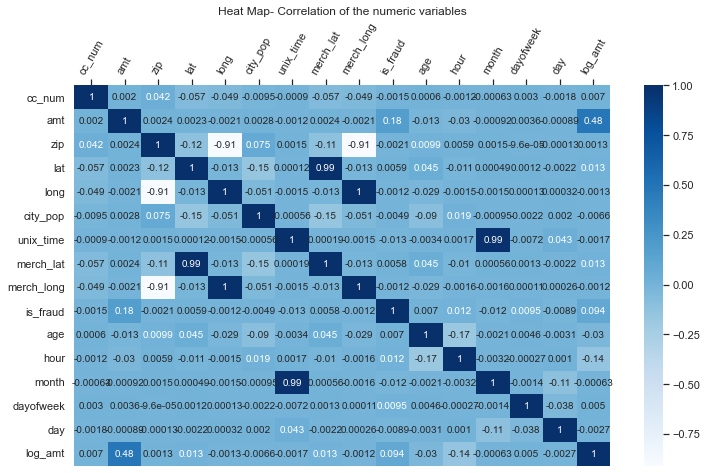

In [199]:
%matplotlib inline
fig = plt.figure(figsize=(12,7))
plt.title('Heat Map- Correlation of the numeric variables')
ax = sns.heatmap(trim_fraud[numerical_columns].corr(),
cmap='Blues',annot=True)
ax.tick_params(axis='x',rotation=60)
ax.xaxis.tick_top()

# Feature selection: Selection of necessary columns from the dataset

In [200]:
df_fraud=trim_fraud[['category','gender','log_amt','zip','lat','long','merch_lat','merch_long','age','hour','day','month','is_fraud']]

In [201]:
df_fraud.head()

,category,gender,log_amt,zip,lat,long,merch_lat,merch_long,age,hour,day,month,is_fraud
0,personal_care,M,1.050822,29209.0,33.9659,-80.9355,33.986391,-81.200714,54,12,21,6,0
1,personal_care,F,3.395850,84002.0,40.3207,-110.4360,39.450498,-109.960431,32,12,21,6,0
2,health_fitness,F,3.720378,11710.0,40.6729,-73.5365,40.495810,-74.196111,52,12,21,6,0
8,shopping_pos,M,1.474763,16858.0,41.0001,-78.2357,41.546067,-78.120238,49,12,21,6,0
9,food_dining,F,4.197803,76678.0,31.6591,-96.8094,31.782919,-96.366185,66,12,21,6,0


In [202]:
df_fraud.dtypes

category       object
gender         object
log_amt       float64
zip           float64
lat           float64
long          float64
merch_lat     float64
merch_long    float64
age             int64
hour            int64
day             int64
month           int64
is_fraud        int64
dtype: object

# Scaling of numeric data using standardscaler()

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [204]:
for col in df_fraud.columns:
#     print(col)
    if (col!='is_fraud' and (df_fraud[col].dtype != 'object')) :
        df_fraud[col]=scaler.fit_transform(df_fraud[[col]])

C:\Users\devel\AppData\Local\Temp\ipykernel_49164\2351456979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud[col]=scaler.fit_transform(df_fraud[[col]])
C:\Users\devel\AppData\Local\Temp\ipykernel_49164\2351456979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud[col]=scaler.fit_transform(df_fraud[[col]])
C:\Users\devel\AppData\Local\Temp\ipykernel_49164\2351456979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [205]:
numerical_columns = [column for column in df_fraud.columns if df_fraud[column].dtype != 'object']
numerical_columns

['log_amt',
 'zip',
 'lat',
 'long',
 'merch_lat',
 'merch_long',
 'age',
 'hour',
 'day',
 'month',
 'is_fraud']

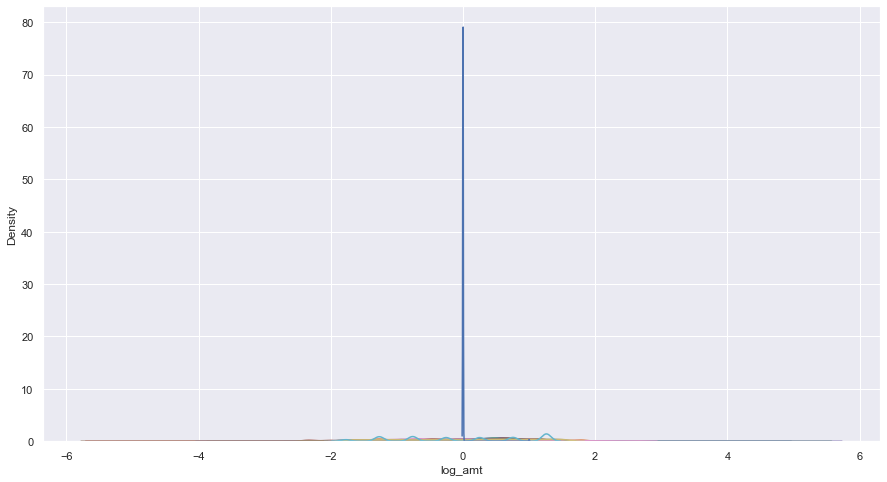

In [206]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numerical_columns:
    sns.kdeplot(df_fraud[i], legend=True)
    

In [207]:
df_fraud.head()

,category,gender,log_amt,zip,lat,long,merch_lat,merch_long,age,hour,day,month,is_fraud
0,personal_care,M,-1.733519,-0.731537,-0.904096,0.677830,-0.893875,0.657966,0.309629,-0.120261,0.507334,-1.772908,0
1,personal_care,F,-0.039931,1.308819,0.351148,-1.472062,0.178138,-1.436215,-0.955111,-0.120261,0.507334,-1.772908,0
2,health_fitness,F,0.194445,-1.383157,0.420717,1.217042,0.383220,1.168017,0.194652,-0.120261,0.507334,-1.772908,0
8,shopping_pos,M,-1.427347,-1.191458,0.485348,0.874581,0.589271,0.882275,0.022188,-0.120261,0.507334,-1.772908,0
9,food_dining,F,0.539243,1.036091,-1.359752,-0.479004,-1.326178,-0.446330,0.999487,-0.120261,0.507334,-1.772908,0


# Get the dependent and independent variables to X and Y

In [208]:
X = df_fraud[['category','gender','log_amt','merch_lat','merch_long','age','hour','day','month']]

In [209]:
X.shape

(553915, 9)

In [210]:
y = df_fraud[['is_fraud']]

In [211]:
y.shape

(553915, 1)

# Converting the categorical variables using get_dummies

In [212]:
X = pd.get_dummies(X, drop_first=True)

In [213]:
X.head()

,log_amt,merch_lat,merch_long,age,hour,day,month,category_food_dining,category_gas_transport,category_grocery_net,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,-1.733519,-0.893875,0.657966,0.309629,-0.120261,0.507334,-1.772908,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,-0.039931,0.178138,-1.436215,-0.955111,-0.120261,0.507334,-1.772908,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.194445,0.383220,1.168017,0.194652,-0.120261,0.507334,-1.772908,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,-1.427347,0.589271,0.882275,0.022188,-0.120261,0.507334,-1.772908,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9,0.539243,-1.326178,-0.446330,0.999487,-0.120261,0.507334,-1.772908,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the data to Test and Train

In [214]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

# Logistic Regression

In [215]:
from sklearn.linear_model import LogisticRegression

In [216]:
model_lg=LogisticRegression()

In [217]:
model_lg.fit(X_train,y_train)

C:\Users\devel\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [218]:
model_lg.score(X_test,y_test)

0.9960734047642689

In [219]:
model_lg.score(X_train,y_train)

0.9961546446656978

In [220]:
pred_train=model_lg.predict(X_train)
pred_test=model_lg.predict(X_test)

In [221]:
accuracy_train_lg = accuracy_score(pred_train,y_train)
accuracy_test_lg = accuracy_score(pred_test,y_test)

In [222]:
confusionMatrix_lg = confusion_matrix(y_test,pred_test)

In [223]:
classificationReport_lg = classification_report(y_test,pred_test)
mae_lg = mean_absolute_error(y_train,pred_train)

In [224]:
print("Model Implemented: ", model_lg)
print("Accuracy on Training Set: ", accuracy_train_lg)
print('Accuracy on Validation Set: ', accuracy_test_lg)
print('Mean absolute error: ',mae_lg)
print('Confusion Matrix\n', confusionMatrix_lg)
print('Classification Report\n', classificationReport_lg)

Model Implemented:  LogisticRegression()
Accuracy on Training Set:  0.9961546446656978
Accuracy on Validation Set:  0.9960734047642689
Mean absolute error:  0.0038453553343021944
Confusion Matrix
 [[110333     15]
 [   420     15]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110348
           1       0.50      0.03      0.06       435

    accuracy                           1.00    110783
   macro avg       0.75      0.52      0.53    110783
weighted avg       0.99      1.00      0.99    110783



# We are getting high accuracy for  the models is because of imbalance in the target variable: is_fraud -- hence we are using Up-sample Minority Class method to address this

In [225]:
from sklearn.utils import resample

In [226]:
df_fraud.is_fraud.value_counts()

0    551777
1      2138
Name: is_fraud, dtype: int64

## Separating the classes to majority and minority classes

In [227]:
fraud_maj = df_fraud[df_fraud.is_fraud==0]
fraud_min = df_fraud[df_fraud.is_fraud==1]

# putting the n_samples=number of records in majority class

In [228]:
fraud_min_upsampled = resample(fraud_min, 
                                 replace=True,     
                                 n_samples=551777,    
                                 random_state=123)

In [229]:
new_frauddf = pd.concat([fraud_maj, fraud_min_upsampled])

In [230]:
new_frauddf.is_fraud.value_counts()

0    551777
1    551777
Name: is_fraud, dtype: int64

# Recreating the models:

# Get the dependent and independent variables to X and Y

In [231]:
X = new_frauddf[['category','gender','log_amt','age','hour','day','month']]

In [232]:
X.shape

(1103554, 7)

In [233]:
y = new_frauddf[['is_fraud']]

In [234]:
y.shape

(1103554, 1)

# Converting the categorical variables using get_dummies

In [235]:
X = pd.get_dummies(X, drop_first=True)

In [236]:
X.head()

,log_amt,age,hour,day,month,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,-1.733519,0.309629,-0.120261,0.507334,-1.772908,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,-0.039931,-0.955111,-0.120261,0.507334,-1.772908,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.194445,0.194652,-0.120261,0.507334,-1.772908,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,-1.427347,0.022188,-0.120261,0.507334,-1.772908,0,0,0,0,0,0,0,0,0,0,0,1,0,1
9,0.539243,0.999487,-0.120261,0.507334,-1.772908,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Splitting the data to Test and Train

In [237]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

# Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
model_lg=LogisticRegression()

In [240]:
model_lg.fit(X_train,y_train)

C:\Users\devel\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [241]:
model_lg.score(X_test,y_test)

0.7670664352932115

In [242]:
model_lg.score(X_train,y_train)

0.766717298545721

In [243]:
pred_train_lg=model_lg.predict(X_train)
pred_test_lg=model_lg.predict(X_test)

In [244]:
accuracy_train_lg = accuracy_score(pred_train_lg,y_train)
accuracy_test_lg = accuracy_score(pred_test_lg,y_test)

In [245]:
confusionMatrix_lg = confusion_matrix(y_test,pred_test_lg)

In [246]:
classificationReport_lg = classification_report(y_test,pred_test_lg)
mae_lg = mean_absolute_error(y_train,pred_train_lg)

In [247]:
#print("Model Implemented: ", model_lg)
print("Accuracy on Training Set: ", accuracy_train_lg)
print('Accuracy on Validation Set: ', accuracy_test_lg)
print('Mean absolute error: ',mae_lg)
print('Confusion Matrix\n', confusionMatrix_lg)
print('Classification Report\n', classificationReport_lg)

Accuracy on Training Set:  0.766717298545721
Accuracy on Validation Set:  0.7670664352932115
Mean absolute error:  0.23328270145427896
Confusion Matrix
 [[85696 24624]
 [26787 83604]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.78      0.77    110320
           1       0.77      0.76      0.76    110391

    accuracy                           0.77    220711
   macro avg       0.77      0.77      0.77    220711
weighted avg       0.77      0.77      0.77    220711



In [248]:
lr_probs = model_lg.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

In [249]:
ns_probs = [0 for _ in range(len(y_test))]

In [250]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [251]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.856


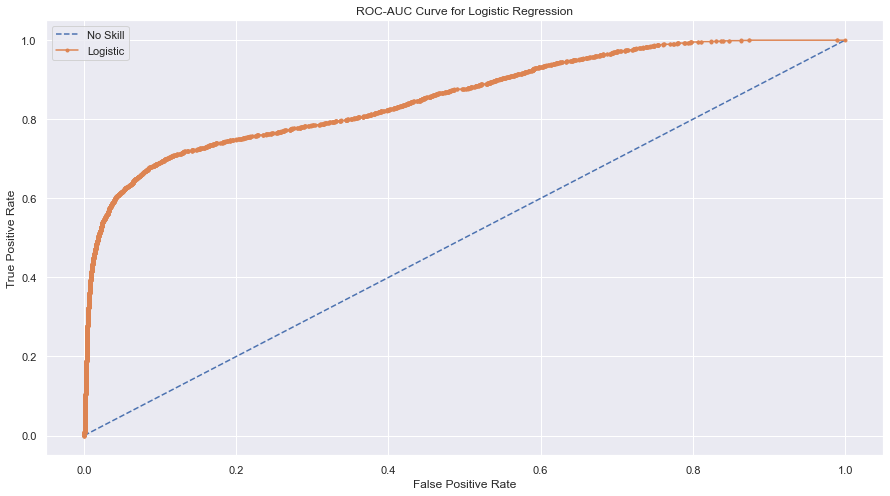

In [252]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.title("ROC-AUC Curve for Logistic Regression")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

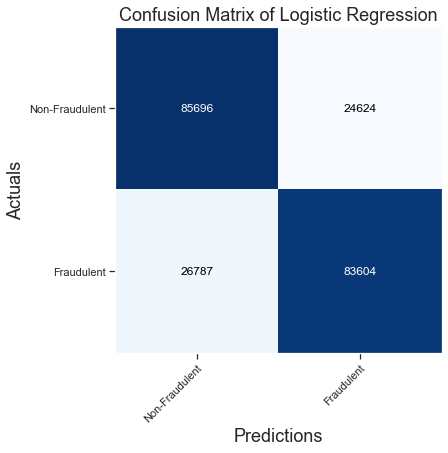

In [253]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=confusionMatrix_lg, figsize=(6, 6), cmap=plt.cm.Blues,class_names = ['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=18)
plt.show()

# Random Forest Classifier

In [254]:
from sklearn.ensemble import RandomForestClassifier

In [255]:
rfc_model=RandomForestClassifier(max_depth= 10, max_features= 5,min_samples_leaf= 30, min_samples_split= 100, n_estimators= 500)

In [256]:
rfc_model.fit(X_train,y_train)

C:\Users\devel\AppData\Local\Temp\ipykernel_49164\1129694993.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=30,
                       min_samples_split=100, n_estimators=500)

In [257]:
rfc_model.score(X_test,y_test)

0.975683133146966

In [258]:
rfc_model.score(X_train,y_train)

0.9762494577178502

In [259]:
pred_train=rfc_model.predict(X_train)
pred_test=rfc_model.predict(X_test)

In [260]:
accuracy_train = accuracy_score(pred_train,y_train)
accuracy_test = accuracy_score(pred_test,y_test)

In [261]:
confusionMatrix = confusion_matrix(y_test,pred_test)

In [262]:
classificationReport = classification_report(y_test,pred_test)
mae = mean_absolute_error(y_train,pred_train)

In [263]:
#print("Model Implemented: ", rfc_model)
print("Accuracy on Training Set: ", accuracy_train)
print('Accuracy on Validation Set: ', accuracy_test)
print('Mean absolute error: ',mae)
print('Confusion Matrix\n', confusionMatrix)
print('Classification Report\n', classificationReport)

Accuracy on Training Set:  0.9762494577178502
Accuracy on Validation Set:  0.975683133146966
Mean absolute error:  0.023750542282149827
Confusion Matrix
 [[108496   1824]
 [  3543 106848]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98    110320
           1       0.98      0.97      0.98    110391

    accuracy                           0.98    220711
   macro avg       0.98      0.98      0.98    220711
weighted avg       0.98      0.98      0.98    220711



In [264]:
rfc_probs = rfc_model.predict_proba(X_test)
rfc_probs = rfc_probs[:, 1]

In [265]:
ns_auc = roc_auc_score(y_test, ns_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)

In [266]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (rfc_auc))

No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.998


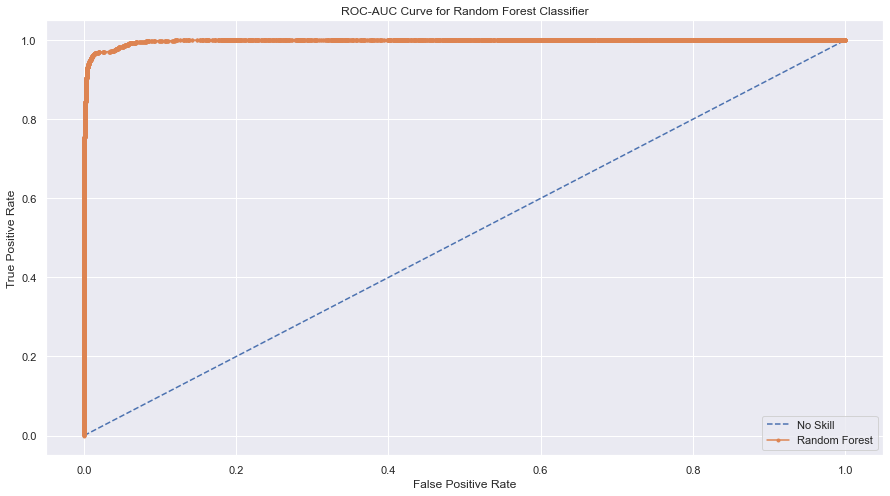

In [267]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest')
plt.title("ROC-AUC Curve for Random Forest Classifier")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

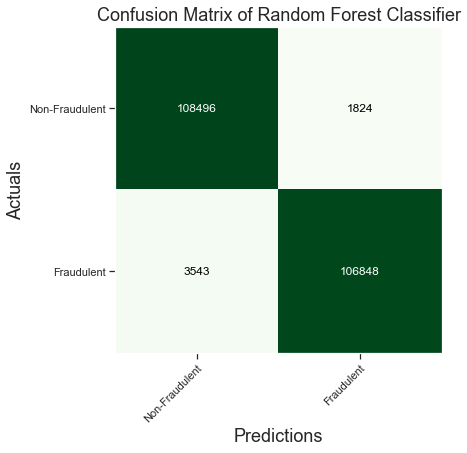

In [268]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=confusionMatrix, figsize=(6, 6), cmap=plt.cm.Greens,class_names = ['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Random Forest Classifier', fontsize=18)
plt.show()

# XG-Boost Classifier

In [269]:
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier

In [270]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [271]:
model_xgb.score(X_test,y_test)

0.9978614568372215

In [272]:
model_xgb.score(X_train,y_train)

0.9981502939933827

In [273]:
pred_train_xgb=model_xgb.predict(X_train)
pred_test_xgb=model_xgb.predict(X_test)

In [274]:
accuracy_train = accuracy_score(pred_train_xgb,y_train)
accuracy_test = accuracy_score(pred_test_xgb,y_test)

In [275]:
confusionMatrix_xgb = confusion_matrix(y_test,pred_test_xgb)

In [276]:
classificationReport_xgb = classification_report(y_test,pred_test_xgb)
mae = mean_absolute_error(y_train,pred_train_xgb)

In [277]:
#print("Model Implemented: ", model_xgb)
print("Accuracy on Training Set: ", accuracy_train)
print('Accuracy on Validation Set: ', accuracy_test)
print('Mean absolute error: ',mae)
print('Confusion Matrix\n', confusionMatrix_xgb)
print('Classification Report\n', classificationReport)

Accuracy on Training Set:  0.9981502939933827
Accuracy on Validation Set:  0.9978614568372215
Mean absolute error:  0.0018497060066172582
Confusion Matrix
 [[109848    472]
 [     0 110391]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98    110320
           1       0.98      0.97      0.98    110391

    accuracy                           0.98    220711
   macro avg       0.98      0.98      0.98    220711
weighted avg       0.98      0.98      0.98    220711



In [278]:
xgb_probs = model_xgb.predict_proba(X_test)
xgb_probs = xgb_probs[:, 1]

In [279]:
ns_auc = roc_auc_score(y_test, ns_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

In [280]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XG Boost: ROC AUC=%.3f' % (rfc_auc))

No Skill: ROC AUC=0.500
XG Boost: ROC AUC=0.998


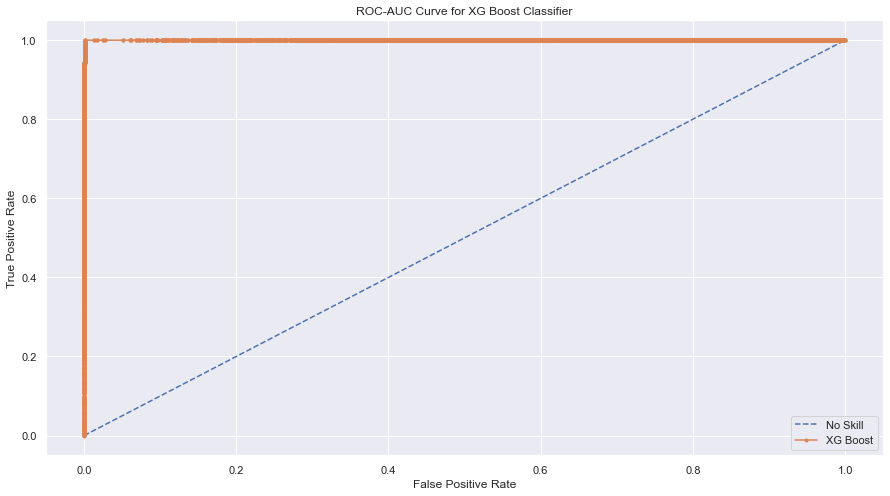

In [281]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XG Boost')
plt.title("ROC-AUC Curve for XG Boost Classifier")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

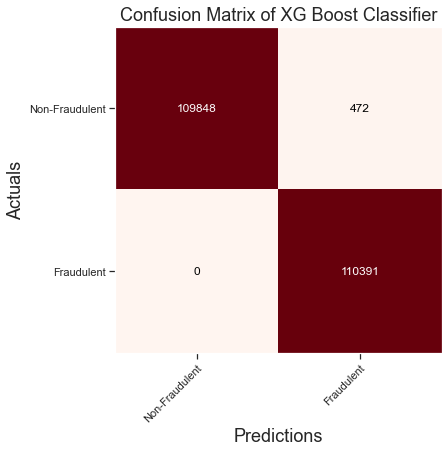

In [282]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=confusionMatrix_xgb, figsize=(6, 6), cmap=plt.cm.Reds,class_names = ['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of XG Boost Classifier', fontsize=18)
plt.show()

# Saving the model

In [290]:
pickle.dump(model_xgb, open('model_xgb.pkl','wb'))

# Testing the model by loading the model again

In [2]:
my_model = pickle.load(open('model_xgb.pkl','rb'))

In [18]:
amount=555479
category='food'
gender='M'
age=54
month='May'
day=21
hour=12
Numeric_cols=['amount', 'age',  'day','hour']
month_dict={'Jan':1,'Feb':2,'Mar':3,'April':4,'May':5,'June':6,'July':7,'Aug':8,'Sept':9,'Oct':10,'Nov':11,'Dec':12}
if month in month_dict.keys():
    n_mon=month_dict.get(month)
if gender == 'M':
    gender_M = 1
else:
    gender_M = 0

cat_col=['category_gas_transport','category_grocery_net','category_grocery_pos','category_health_fitness','category_home','category_kids_pets','category_misc_net','category_misc_pos','category_personal_care','category_shopping_net','category_shopping_pos','category_travel']
Column_Names= ['log_amt','age','hour','day','month','category_food_dining','category_gas_transport','category_grocery_net','category_grocery_pos','category_health_fitness','category_home','category_kids_pets','category_misc_net','category_misc_pos','category_personal_care','category_shopping_net','category_shopping_pos','category_travel','gender_M']
df=pd.DataFrame(columns=Column_Names)
df.at[0,'log_amt']=amount
df.at[0,'age']=age
df.at[0,'hour']=hour
df.at[0,'day']=day
df.at[0,'month']=n_mon
df.at[0,'gender_M']=gender_M


for col in cat_col:

    if col.__contains__(category):
        df.at[0,col]=1


df=df.fillna(0)   

In [19]:
df

,log_amt,age,hour,day,month,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,555479,54,12,21,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
df.values

array([[555479,     54,     12,     21,      5,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      1]], dtype=int64)

In [17]:
print(my_model.predict(df.values))

[0]
